In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import tkinter as tk
from tkinter import filedialog as fd

In [13]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".geojson", ".geojson")])
root.destroy()

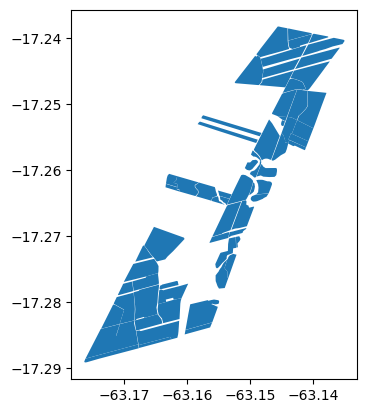

In [14]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)
data.plot()
plt.show()

In [15]:
data

,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE,geometry
0,L11.2,FY,15.566024,SP 83-5073,20190801,3,SOCA,60.460926,388,19.0,0000190000L11.2,359,"POLYGON Z ((-63.14087 -17.24907 0.00000, -63.1..."
1,L11.1,FY,10.603952,SP 83-5073,20190801,3,SOCA,60.460926,388,19.0,0000190000L11.1,359,"POLYGON Z ((-63.14405 -17.25179 0.00000, -63.1..."
2,L15,F,16.424708,CITTCA 85-22,20140420,8,SOCA,60.460926,18358,19.0,0000190000L15,359,"POLYGON Z ((-63.14943 -17.25692 0.00000, -63.1..."
3,L19.3,FY,4.761826,UCG 96-10,20220413,0,HOJA,60.460926,388,19.0,0000190000L19.3,359,"POLYGON Z ((-63.14756 -17.25972 0.00000, -63.1..."
4,L30.2,F,8.149126,CITTCA 85-22,20160315,6,SOCA,60.460926,18358,19.0,0000190000L30.2,359,"POLYGON Z ((-63.17002 -17.28121 0.00000, -63.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,L30.8,F,7.475111,RENOVACION,0,122,RENOVACION,60.460926,18358,19.0,0000190000L30.8,359,"POLYGON Z ((-63.16814 -17.28421 0.00000, -63.1..."
62,L30.11,FA,11.686298,RENOVACION,0,122,RENOVACION,60.460926,388,19.0,0000190000L30.11,359,"POLYGON Z ((-63.16838 -17.28224 0.00000, -63.1..."
63,L31.2,FY,8.856908,SP 83-5073,20220421,0,HOJA,60.460926,388,19.0,0000190000L31.2,359,"POLYGON Z ((-63.16410 -17.27813 0.00000, -63.1..."
64,L25.2,FY,3.677806,RB-2,20190807,3,SOCA,60.460926,388,19.0,0000190000L25.2,359,"POLYGON Z ((-63.15270 -17.27273 0.00000, -63.1..."


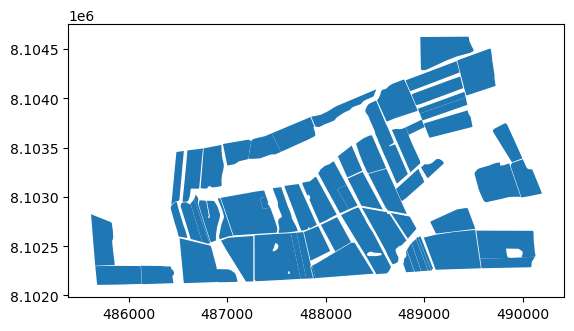

In [7]:
propiedad = data[data['unidad_01']==47]
propiedad.plot()
plt.show()

In [54]:
gdf_disuelto = data.dissolve(by='COD_CA')

In [55]:
gdf_disuelto

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_PROP,ID,CUADRANTE
COD_CA,,,,,,,,,,,,
388,"MULTIPOLYGON Z (((-63.17595 -17.28916 0.00000,...",L11.2,FY,15.566024,SP 83-5073,20190801,3,SOCA,60.460926,19.0,0000190000L11.2,359
18358,"MULTIPOLYGON Z (((-63.16814 -17.28421 0.00000,...",L15,F,16.424708,CITTCA 85-22,20140420,8,SOCA,60.460926,19.0,0000190000L15,359


In [56]:
#gdf_disuelto.crs = "EPSG:4326"
gdf_disuelto = gdf_disuelto.to_crs(epsg=3857)

In [57]:
gdf_disuelto['geometry'] = gdf_disuelto.geometry.buffer(100)

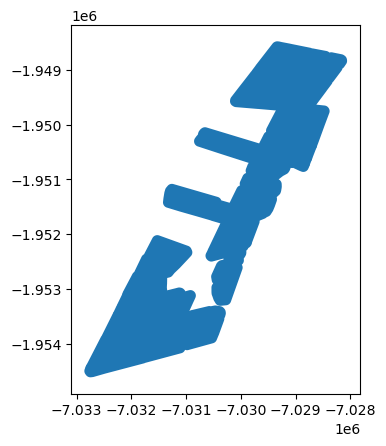

In [58]:
gdf_disuelto.plot()

In [59]:
gdf_disuelto

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_PROP,ID,CUADRANTE
COD_CA,,,,,,,,,,,,
388,"MULTIPOLYGON (((-7029803.663 -1949019.363, -70...",L11.2,FY,15.566024,SP 83-5073,20190801,3,SOCA,60.460926,19.0,0000190000L11.2,359
18358,"MULTIPOLYGON (((-7029849.729 -1950801.020, -70...",L15,F,16.424708,CITTCA 85-22,20140420,8,SOCA,60.460926,19.0,0000190000L15,359
